In [25]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

In [26]:
# Load the dataset
airline_data = pd.read_csv(r"Indian Airlines Dataset.csv")

In [27]:
# Display the first 17 rows of the dataset
print(airline_data.head(17))

    Unnamed: 0    airline   flight source_city departure_time stops  \
0            0   SpiceJet  SG-8709       Delhi        Evening  zero   
1            1   SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2            2    AirAsia   I5-764       Delhi  Early_Morning  zero   
3            3    Vistara   UK-995       Delhi        Morning  zero   
4            4    Vistara   UK-963       Delhi        Morning  zero   
5            5    Vistara   UK-945       Delhi        Morning  zero   
6            6    Vistara   UK-927       Delhi        Morning  zero   
7            7    Vistara   UK-951       Delhi      Afternoon  zero   
8            8   GO_FIRST   G8-334       Delhi  Early_Morning  zero   
9            9   GO_FIRST   G8-336       Delhi      Afternoon  zero   
10          10   GO_FIRST   G8-392       Delhi      Afternoon  zero   
11          11   GO_FIRST   G8-338       Delhi        Morning  zero   
12          12     Indigo  6E-5001       Delhi  Early_Morning  zero   
13    

In [28]:
# Display summary statistics of numerical columns
print(airline_data.describe())

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


In [29]:
# Display information about the dataset
print(airline_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [30]:
# Check for missing values
print(airline_data.isnull().sum())

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [31]:
# Check correlation between numerical variables
correlation_matrix = airline_data.select_dtypes(include=['float64', 'int64']).corr()
print(correlation_matrix)

            Unnamed: 0  duration  days_left     price
Unnamed: 0    1.000000  0.159007   0.014638  0.761177
duration      0.159007  1.000000  -0.039157  0.204222
days_left     0.014638 -0.039157   1.000000 -0.091949
price         0.761177  0.204222  -0.091949  1.000000


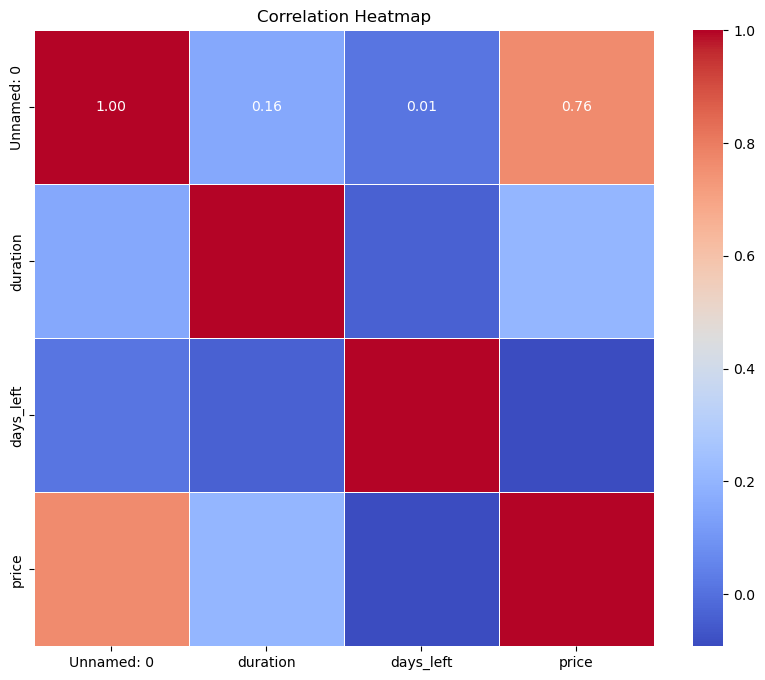

In [32]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

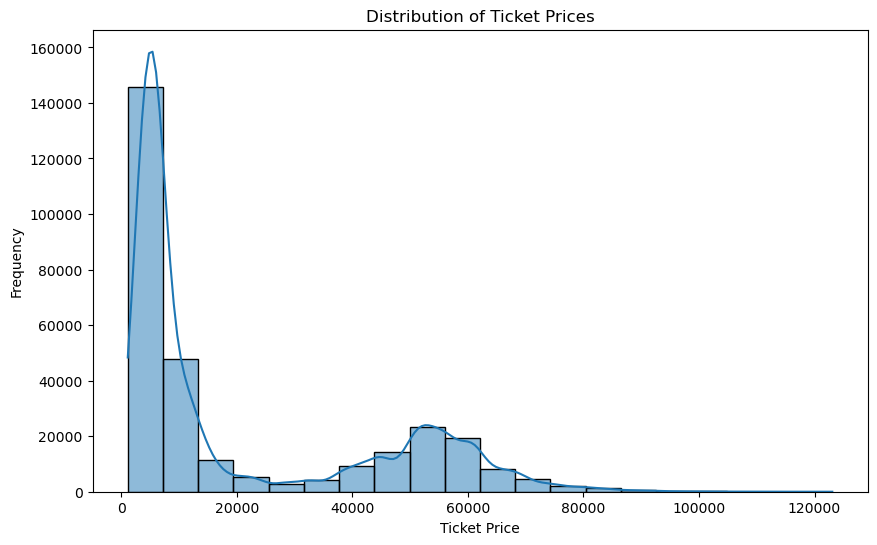

In [33]:
# Plot 1: Distribution of Ticket Prices
plt.figure(figsize=(10, 6))
sns.histplot(airline_data['price'], bins=20, kde=True)
plt.xlabel('Ticket Price')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Prices')
plt.show()

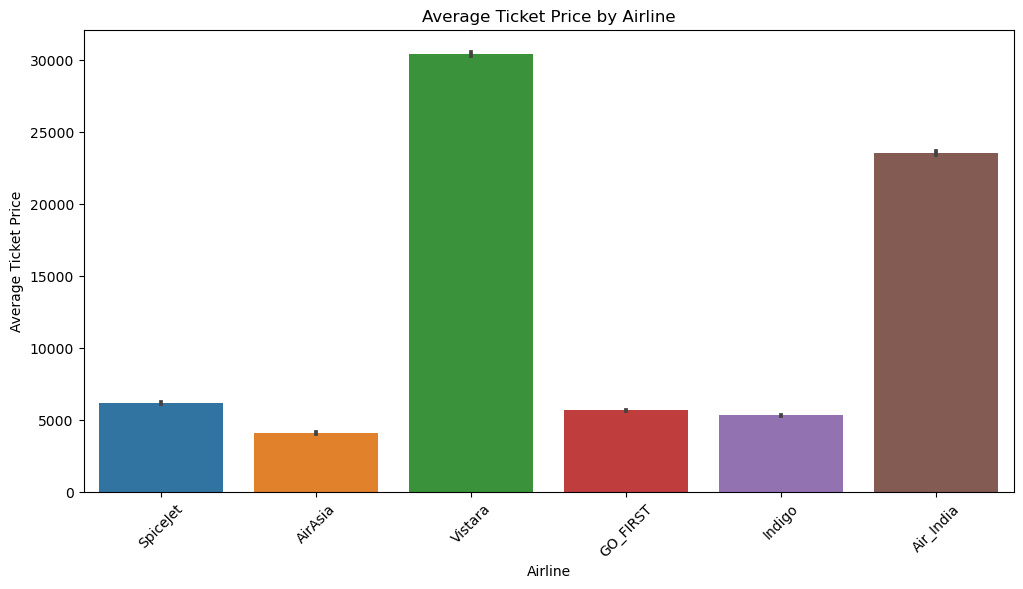

In [34]:
# Plot 2: Average Ticket Price by Airline
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=airline_data, estimator=np.mean)
plt.xlabel('Airline')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Airline')
plt.xticks(rotation=45)
plt.show()

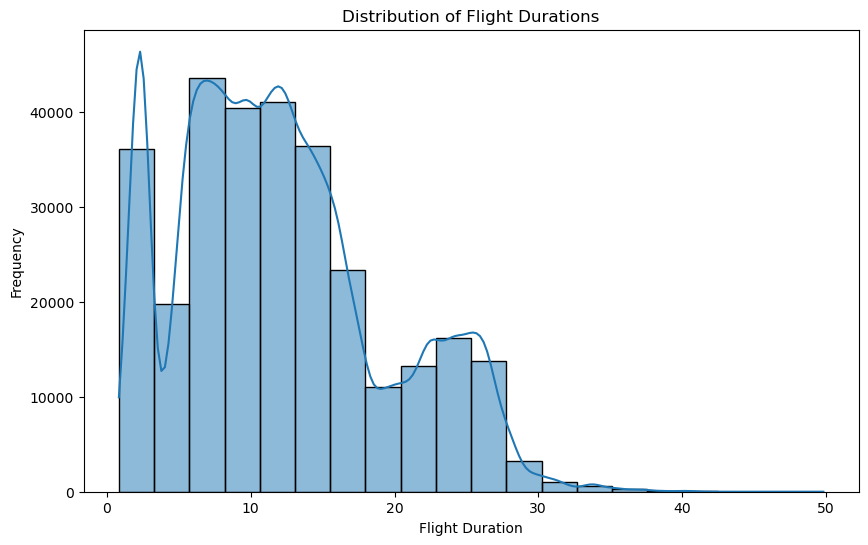

In [35]:
# Plot 3: Distribution of Flight Durations
plt.figure(figsize=(10, 6))
sns.histplot(airline_data['duration'], bins=20, kde=True)
plt.xlabel('Flight Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Durations')
plt.show()

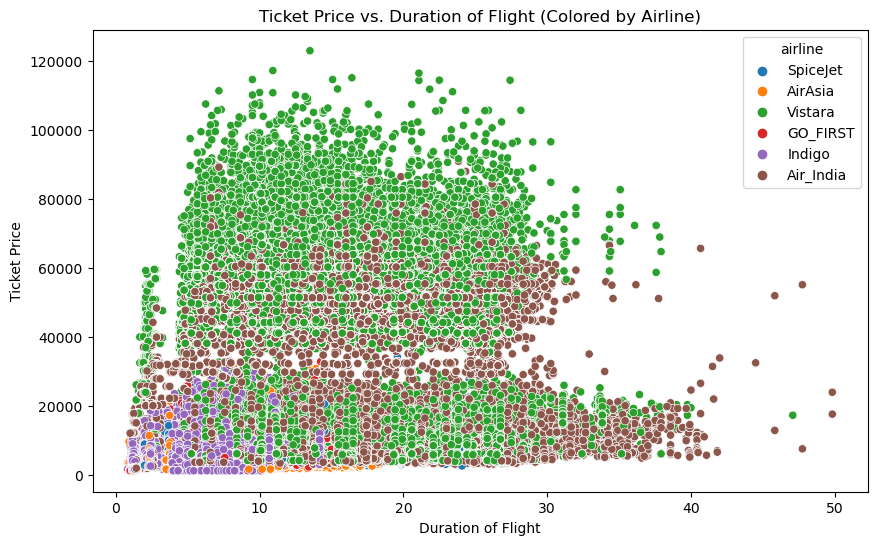

In [36]:
# Plot 4: Ticket Price vs. Duration of Flight with different colors based on Airline
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', hue='airline', data=airline_data)
plt.xlabel('Duration of Flight')
plt.ylabel('Ticket Price')
plt.title('Ticket Price vs. Duration of Flight (Colored by Airline)')
plt.show()

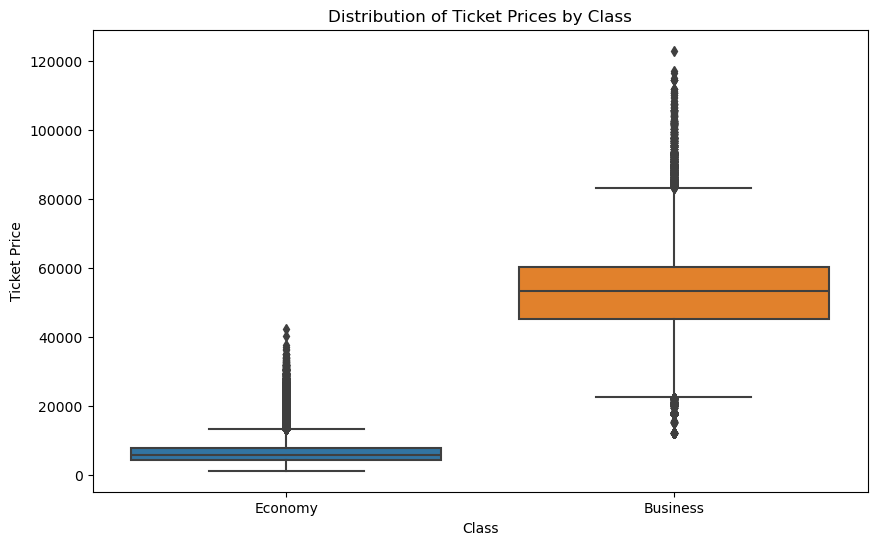

In [37]:
# Plot 5: Distribution of Ticket Prices by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=airline_data)
plt.xlabel('Class')
plt.ylabel('Ticket Price')
plt.title('Distribution of Ticket Prices by Class')
plt.show()

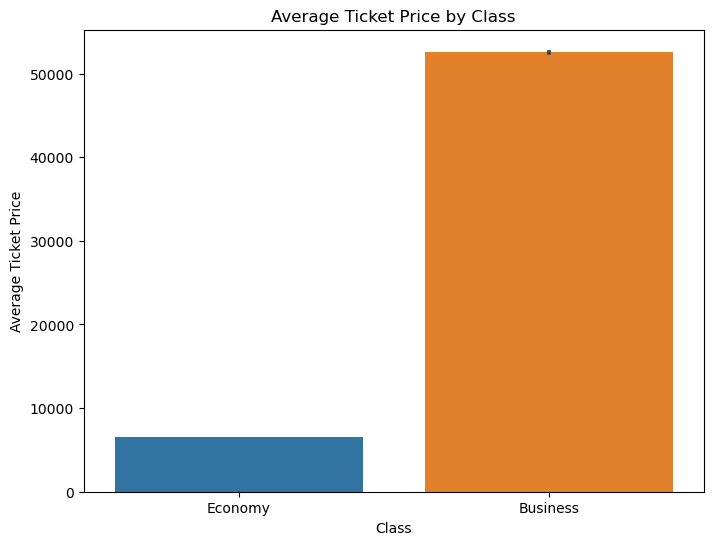

In [38]:
# Plot 6: Average Ticket Price by Class
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='price', data=airline_data, estimator=np.mean)
plt.xlabel('Class')
plt.ylabel('Average Ticket Price')
plt.title('Average Ticket Price by Class')
plt.show()

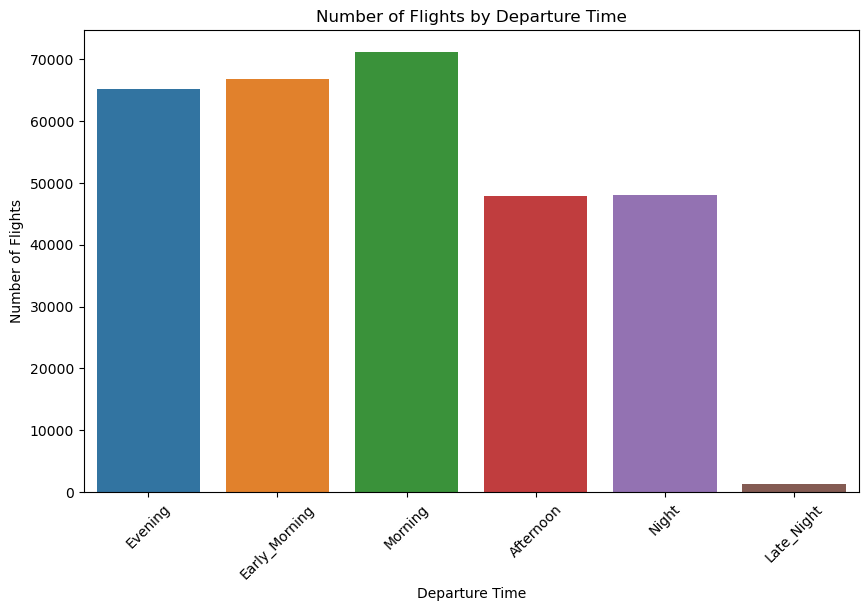

In [39]:
# Plot 7: Number of Flights by Departure Time
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_time', data=airline_data)
plt.xlabel('Departure Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Departure Time')
plt.xticks(rotation=45)
plt.show()

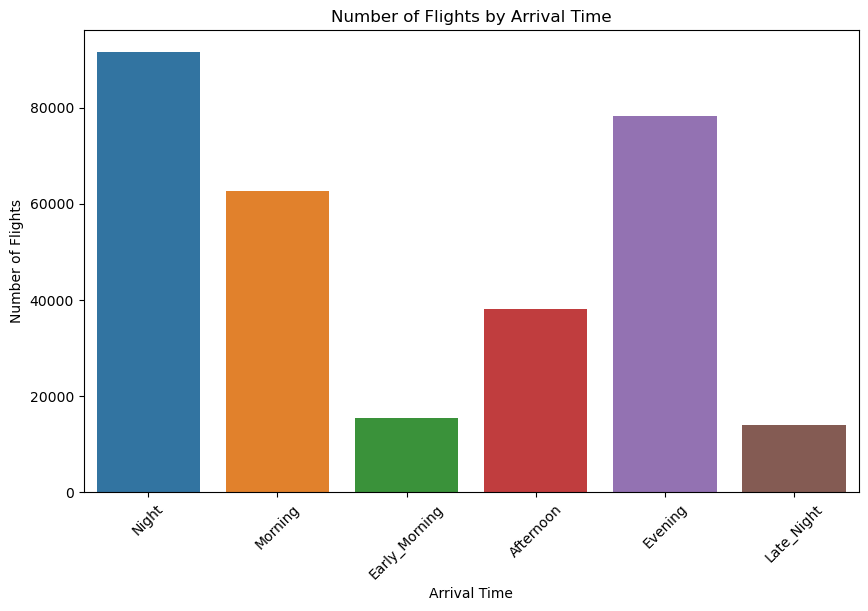

In [40]:
# Plot 8: Number of Flights by Arrival Time
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_time', data=airline_data)
plt.xlabel('Arrival Time')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Arrival Time')
plt.xticks(rotation=45)
plt.show()

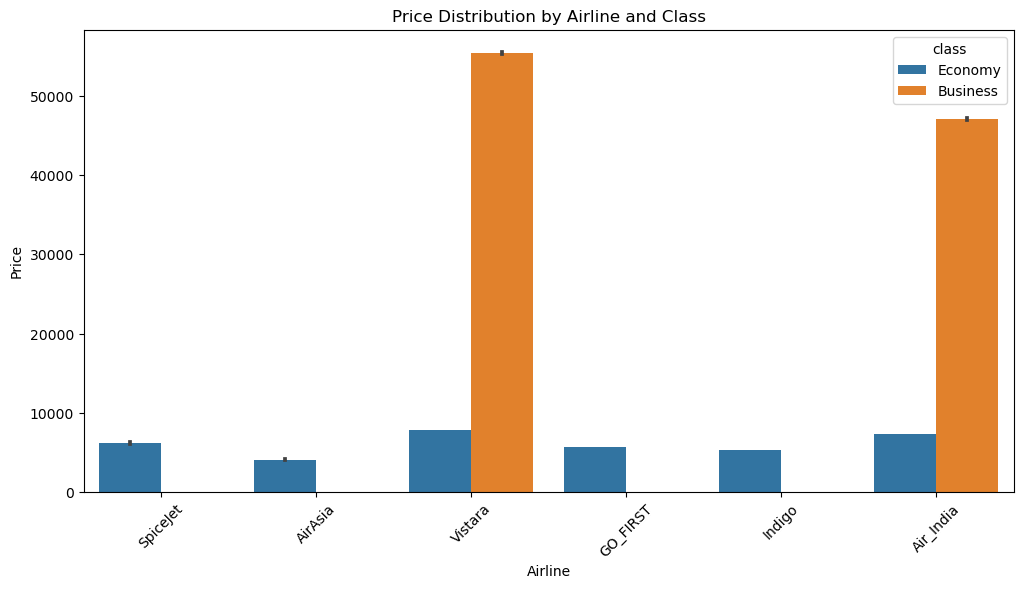

In [41]:
# Plot 9: Price Distribution by Airline and Class
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', hue='class', data=airline_data, estimator=np.mean)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Distribution by Airline and Class')
plt.xticks(rotation=45)
plt.show()

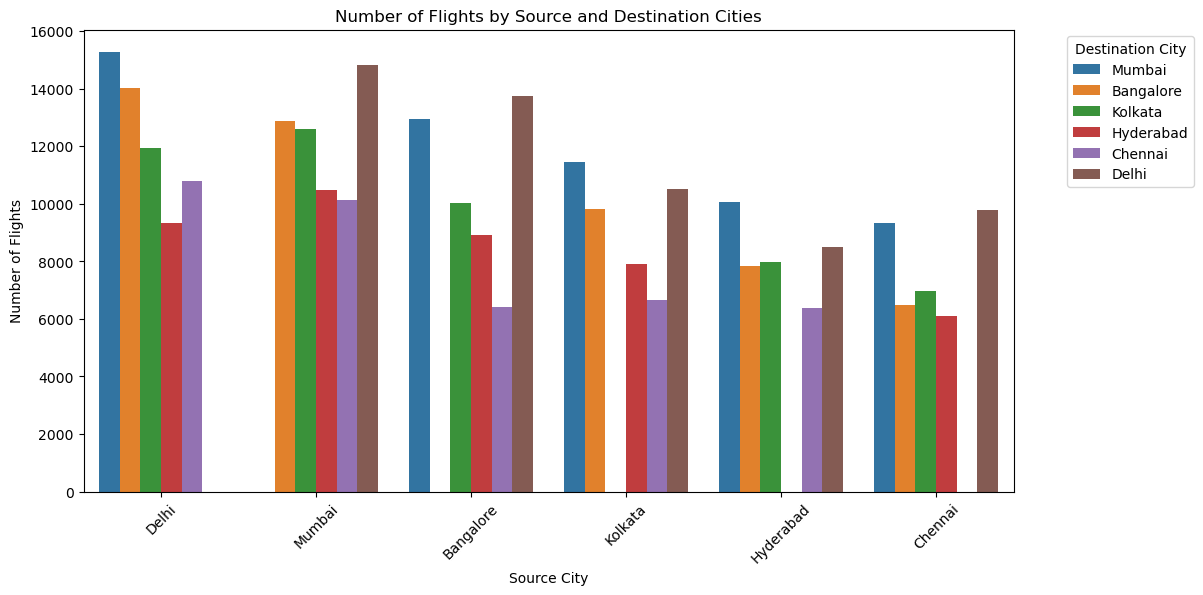

In [42]:
# Plot 10: Number of Flights by Source and Destination Cities
plt.figure(figsize=(12, 6))
sns.countplot(x='source_city', hue='destination_city', data=airline_data)
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Source and Destination Cities')
plt.xticks(rotation=45)
plt.legend(title='Destination City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [43]:
# Machine Learning Modeling

# Feature Selection
X = airline_data[['duration']]
y = airline_data['price']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 493099402.3447103
R-squared Score: 0.043421223913671314


In [ ]:
# Plot predicted prices vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Duration of Flight')
plt.ylabel('Ticket Price')
plt.title('Predicted Prices vs. Actual Prices')
plt.legend()
plt.show()